In [7]:
import pandas as pd
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from sklearn import datasets

# PCA  Analysis on Olivetti Faces Image

In [2]:
oliv = datasets.fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /home/ashish/scikit_learn_data


In [3]:
oliv.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [4]:
print(oliv.data.shape)
print(oliv.images.shape)
print(oliv.target.shape)

(400, 4096)
(400, 64, 64)
(400,)


In [5]:
x = oliv.data
y = oliv.target

In [6]:
x[0]

array([0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
       0.1570248 ], dtype=float32)

In [48]:
oliv.images[0]

array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083, 0.3305785 ,
        0.30578512],
       [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083, 0.338843  ,
        0.3140496 ],
       [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528, 0.338843  ,
        0.29752067],
       ...,
       [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256, 0.16528925,
        0.17355372],
       [0.20247933, 0.2107438 , 0.2107438 , ..., 0.14876033, 0.16115703,
        0.16528925],
       [0.20247933, 0.20661157, 0.20247933, ..., 0.15289256, 0.16115703,
        0.1570248 ]], dtype=float32)

In [49]:
oliv.images.shape

(400, 64, 64)

<function matplotlib.pyplot.show(*args, **kw)>

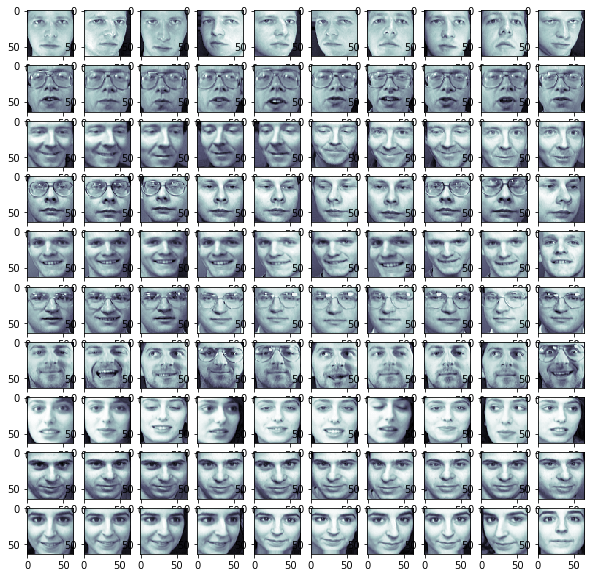

In [6]:
fig = plt.figure(figsize=(10,10))
for i in range(100):
    ax = fig.add_subplot(10, 10, 1 + i)
    ax.imshow(oliv.images[i], cmap = plt.cm.bone)
plt.show

In [10]:
oliv.images[399].shape

(64, 64)

In [11]:
from sklearn.decomposition import PCA
pca = PCA()

In [12]:
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [13]:
pca.components_.shape

(400, 4096)

In [14]:
# For finding the best number of features and we can also say that "Best Feature Selection for PCA"
k = 0
total = sum(pca.explained_variance_)
currentSum = 0
while currentSum/total < 0.99:
    currentSum += pca.explained_variance_[k]
    k += 1
k

260

In [15]:
pca_1 = PCA(n_components = k, whiten=True)
x_pca = pca_1.fit_transform(x)
x_pca.shape

(400, 260)

In [16]:
x_approx = pca_1.inverse_transform(x_pca)
x_approx.shape

(400, 4096)

In [17]:
x_approx

array([[0.35519654, 0.40037963, 0.41235608, ..., 0.18594563, 0.1431518 ,
        0.16440873],
       [0.45979667, 0.48837835, 0.5125865 , ..., 0.15036343, 0.1466656 ,
        0.1364842 ],
       [0.3181817 , 0.38526252, 0.48887646, ..., 0.14368406, 0.13047124,
        0.14310826],
       ...,
       [0.5067202 , 0.54537004, 0.5988553 , ..., 0.18934727, 0.16856785,
        0.18590224],
       [0.2412638 , 0.24888939, 0.26159978, ..., 0.5981295 , 0.61751795,
        0.614303  ],
       [0.5228138 , 0.46577132, 0.29929894, ..., 0.3405385 , 0.3576426 ,
        0.4127373 ]], dtype=float32)

In [18]:
x_approx_image = x_approx.reshape((400, 64,64))

In [19]:
x_approx_image[0:1]

array([[[0.35519654, 0.40037963, 0.41235608, ..., 0.3746364 ,
         0.37070632, 0.33507657],
        [0.3616742 , 0.4124462 , 0.4267414 , ..., 0.37916356,
         0.34581617, 0.32707512],
        [0.35358   , 0.39688045, 0.43415236, ..., 0.37672472,
         0.36311606, 0.29979405],
        ...,
        [0.19675055, 0.21219674, 0.20850545, ..., 0.16897894,
         0.1688151 , 0.18518862],
        [0.20967905, 0.22784498, 0.21868351, ..., 0.15241674,
         0.14822869, 0.18779317],
        [0.19655165, 0.23495515, 0.22167906, ..., 0.18594563,
         0.1431518 , 0.16440873]]], dtype=float32)

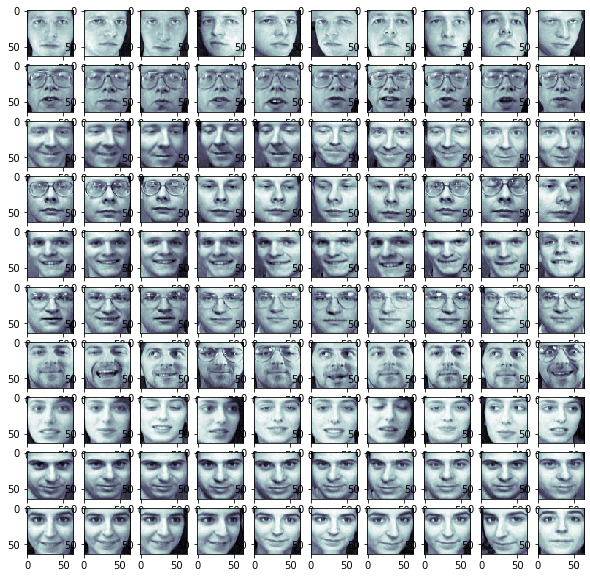

In [20]:
fig1 = plt.figure(figsize=(10,10))
for i in range(100):
    ax1 = fig1.add_subplot(10, 10, i+1)
    ax1.imshow(x_approx_image[i], cmap = plt.cm.bone)
plt.show()

In [21]:
eigenv = pca_1.components_
eigenv.shape

(260, 4096)

In [22]:
eigen_faces = eigenv.reshape((260, 64, 64))

<function matplotlib.pyplot.show(*args, **kw)>

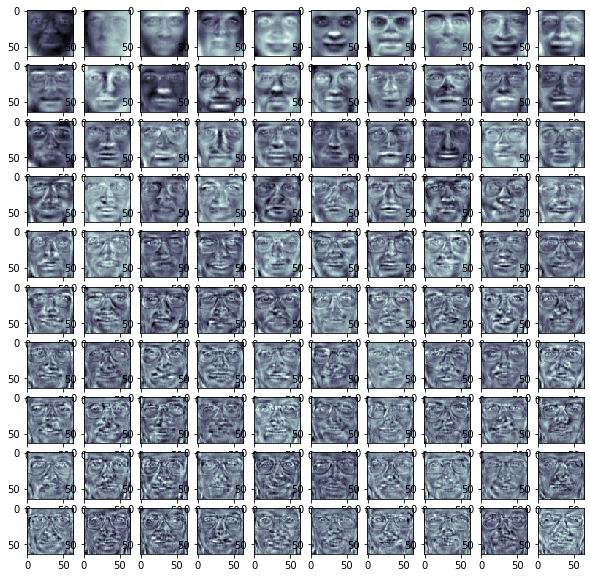

In [23]:
fig_2 = plt.figure(figsize=(10, 10))
for i in range(100):
    ax_2 = fig_2.add_subplot(10, 10, i + 1)
    ax_2.imshow(eigen_faces[i], cmap = plt.cm.bone)
plt.show

# PCA Analysis on LFW Image 

In [24]:
lfw = datasets.fetch_lfw_people()

In [25]:
lfw.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [26]:
lfw.target_names

array(['AJ Cook', 'AJ Lamas', 'Aaron Eckhart', ..., 'Zumrati Juma',
       'Zurab Tsereteli', 'Zydrunas Ilgauskas'], dtype='<U35')

In [27]:
lfw.images.shape

(13233, 62, 47)

In [28]:
X = lfw.data
Y = lfw.target

In [29]:
X.shape, Y.shape

((13233, 2914), (13233,))

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state = 0)

In [51]:
x_train.shape

(9924, 2914)

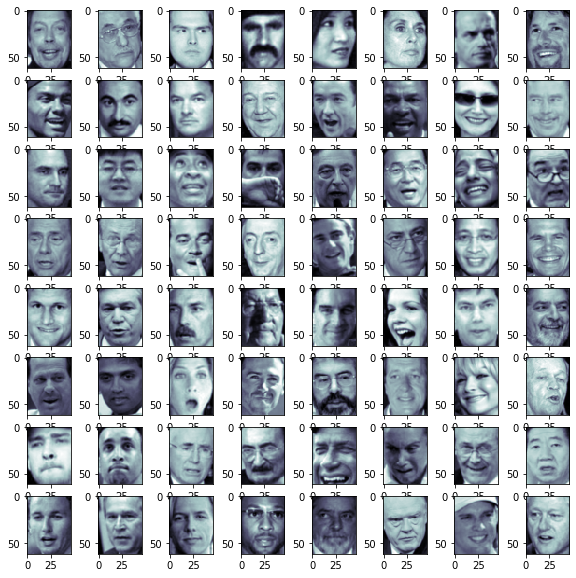

In [31]:
fig4 = plt.figure(figsize=(10,10))
for i in range(64):
    ax4 = fig4.add_subplot(8,8, i+1)
    ax4.imshow(lfw.images[i], cmap=plt.cm.bone)
plt.show()

In [32]:
pca_lfw = PCA()
pca_lfw.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [33]:
k  = 0
total = 0
while total < 0.95:
    total += pca_lfw.explained_variance_ratio_[k]
    k += 1
k

175

In [34]:
pca_lfw_1 = PCA(n_components=k, whiten=True)
x_transform_lfw = pca_lfw_1.fit_transform(x_train)
x_transform_lfw.shape

(9924, 175)

In [35]:
x_approx_lfw = pca_lfw_1.inverse_transform(x_transform_lfw)
x_approx_lfw.shape

(9924, 2914)

In [36]:
x_approx_lfw = x_approx_lfw.reshape((9924, 62, 47))

array([[143.      , 142.33333 , 134.      , ...,  81.666664,  85.      ,
         87.666664],
       [ 72.      ,  63.333332,  58.333332, ...,  76.666664,  58.      ,
         48.      ],
       [123.333336, 207.      , 223.66667 , ...,  96.333336, 114.      ,
        108.666664],
       ...,
       [240.      , 229.      , 193.      , ..., 145.66667 , 144.66667 ,
        141.66667 ],
       [ 91.666664, 102.      , 122.666664, ..., 160.      ,  82.      ,
         47.      ],
       [ 49.333332,  49.666668,  53.333332, ...,  76.333336, 118.      ,
        145.66667 ]], dtype=float32)

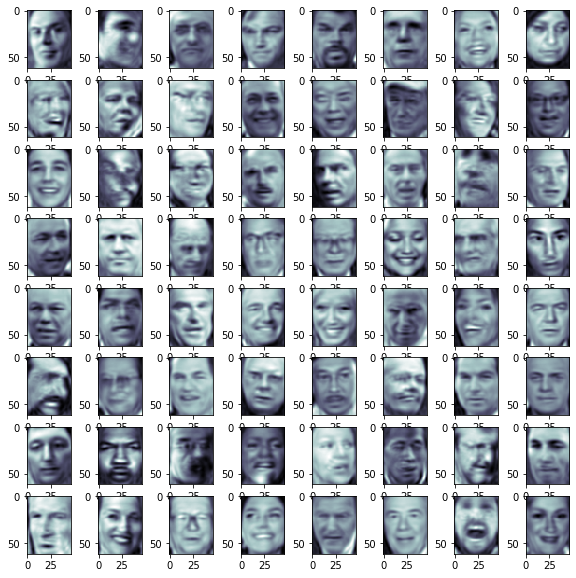

In [37]:
fig4 = plt.figure(figsize=(10,10))
for i in range(64):
    ax4 = fig4.add_subplot(8,8, i+1)
    ax4.imshow(x_approx_lfw[i], cmap=plt.cm.bone)
plt.show()

In [38]:
eigenv_lfw = pca_lfw_1.components_
eigenv_lfw.shape

(175, 2914)

In [39]:
eigenv_faces_lfw = eigenv_lfw.reshape((175, 62, 47))

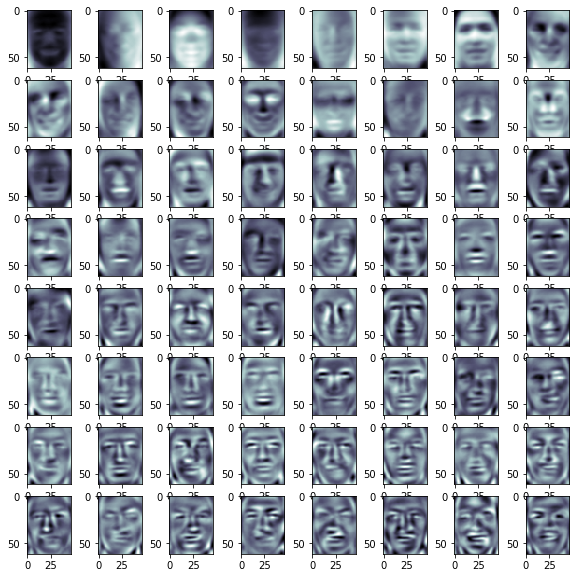

In [40]:
fig4 = plt.figure(figsize=(10,10))
for i in range(64):
    ax4 = fig4.add_subplot(8,8, i+1)
    ax4.imshow(eigenv_faces_lfw[i], cmap=plt.cm.bone)
plt.show()